## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Метрикой качества для в данном задании является средняя абсолютная ошибка, MAE.

In [2]:
! wget https://www.dropbox.com/s/psutl0zafq50828/data.tsv > ./data.tsv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [1]:
! pip install catboost==0.22
! pip install lightgbm==2.3.1

ERROR: Ignored the following yanked versions: 0.1.1
ERROR: Could not find a version that satisfies the requirement catboost==0.22 (from versions: 1.2, 1.2.1, 1.2.2, 1.2.3, 1.2.5, 1.2.6, 1.2.7)
ERROR: No matching distribution found for catboost==0.22


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ------------------- -------------------- 262.1/544.4 kB ? eta -:--:--
   -------------------------------------- 544.4/544.4 kB 752.6 kB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


  You can safely remove it manually.


In [29]:
import pandas as pd
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('./data.tsv', sep='\t')
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

In [91]:
X_train

,agent_fee,floor,floors_total,kitchen_area,living_area,price,rooms_offered,total_area,total_images,balcony,building_type,month,renovation,studio
0,60.000000,7,9.0,9.0,31.0,30000,2,48.0,12,0,4,June,0,False
1,50.000000,5,17.0,-1.0,-1.0,55000,2,60.0,12,0,4,June,0,False
2,50.000000,8,17.0,12.0,-1.0,45000,2,68.0,13,0,4,June,0,False
3,60.000000,7,16.0,10.0,20.0,25000,1,40.0,12,0,6,June,0,False
4,50.000000,7,14.0,8.0,30.0,50000,2,40.0,16,0,1,June,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198385,-1.000000,6,12.0,15.0,80.0,95000,3,120.0,9,2,1,October,0,False
198386,-1.000000,3,3.0,9.0,45.0,50000,3,76.0,19,5,6,October,10,False
198387,40.000000,10,17.0,9.0,20.0,40000,1,38.0,0,1,4,October,1,False
198388,-1.000000,10,16.0,12.0,59.0,55000,3,78.0,14,2,4,October,10,False


In [92]:
num_features_t = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features_t = ['balcony', 'building_type', 'renovation']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(data[num_features_t+cat_features_t], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

Обучите реализации градиентного бустинга LightGBM и Catboost на **вещественных** признаках без подбора параметров. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до тысячных.

В этом и последующих экспериментах советуем измерять время обучения моделей.

In [93]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [94]:
%%time
gbm = CatBoostRegressor().fit(X_train_t, y_train_t)
lgbm = LGBMRegressor().fit(X_train_t, y_train_t)

Learning rate set to 0.094447
0:	learn: 82.6001450	total: 23.7ms	remaining: 23.7s
1:	learn: 82.2577460	total: 46ms	remaining: 22.9s
2:	learn: 81.9585977	total: 69.6ms	remaining: 23.1s
3:	learn: 81.7094325	total: 89.3ms	remaining: 22.2s
4:	learn: 81.4757391	total: 108ms	remaining: 21.6s
5:	learn: 81.2964697	total: 132ms	remaining: 21.8s
6:	learn: 81.1287763	total: 155ms	remaining: 21.9s
7:	learn: 80.9697854	total: 175ms	remaining: 21.7s
8:	learn: 80.8407317	total: 198ms	remaining: 21.8s
9:	learn: 80.7459077	total: 226ms	remaining: 22.3s
10:	learn: 80.6631329	total: 247ms	remaining: 22.2s
11:	learn: 80.5761347	total: 273ms	remaining: 22.5s
12:	learn: 80.5091502	total: 294ms	remaining: 22.3s
13:	learn: 80.4421936	total: 317ms	remaining: 22.3s
14:	learn: 80.3889560	total: 340ms	remaining: 22.3s
15:	learn: 80.3363987	total: 361ms	remaining: 22.2s
16:	learn: 80.2953011	total: 383ms	remaining: 22.2s
17:	learn: 80.2484032	total: 406ms	remaining: 22.2s
18:	learn: 80.2069148	total: 428ms	remaini

In [95]:
import numpy as np

In [96]:
np.round(
    np.abs(
        mean_absolute_error(gbm.predict(X_test_t), y_test) 
        - mean_absolute_error(lgbm.predict(X_test_t), y_test)
    )
,3)

0.082

__Задание 2.__

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

В качестве оптимизируемого функционала в алгоритме используйте MAE (loss_function='MAE'), random_seed=0, другие параметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE.

In [97]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
grid = {
    'depth': [5,7,9],
    'learning_rate': [0.05, 0.1, 0.5],
}
gmb = CatBoostRegressor(random_seed=0, loss_function='MAE').grid_search(grid, X= X_train_t, y = y_train_t)

0:	learn: 50.3421002	test: 49.6450290	best: 49.6450290 (0)	total: 28.3ms	remaining: 28.2s
1:	learn: 49.0197242	test: 48.3252395	best: 48.3252395 (1)	total: 52.9ms	remaining: 26.4s
2:	learn: 47.7748249	test: 47.0874341	best: 47.0874341 (2)	total: 82.8ms	remaining: 27.5s
3:	learn: 46.7178469	test: 46.0330549	best: 46.0330549 (3)	total: 109ms	remaining: 27.2s
4:	learn: 45.6509119	test: 44.9746254	best: 44.9746254 (4)	total: 137ms	remaining: 27.3s
5:	learn: 44.6785659	test: 44.0105914	best: 44.0105914 (5)	total: 163ms	remaining: 27.1s
6:	learn: 43.7633147	test: 43.1069738	best: 43.1069738 (6)	total: 190ms	remaining: 26.9s
7:	learn: 42.9414363	test: 42.2930001	best: 42.2930001 (7)	total: 215ms	remaining: 26.6s
8:	learn: 42.1943548	test: 41.5540262	best: 41.5540262 (8)	total: 242ms	remaining: 26.6s
9:	learn: 41.5079217	test: 40.8762935	best: 40.8762935 (9)	total: 271ms	remaining: 26.9s
10:	learn: 40.8655465	test: 40.2424025	best: 40.2424025 (10)	total: 296ms	remaining: 26.6s
11:	learn: 40.29

In [98]:
y_pred = gbm.predict(X_test_t)
round(mean_absolute_error(y_test_t, y_pred),3)

39.675

__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Перебирая комбинации параметров из предыдущего пункта, используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost.

Выведите значение MAE на тестовой выборке для лучшей модели.

In [99]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
grid = {
    'depth': [5,7,9],
    'learning_rate': [0.05, 0.1, 0.5],
}
gmb_categorial = CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=['month']).grid_search(grid, X= X_train, y = y_train)

0:	learn: 50.3903088	test: 49.6915409	best: 49.6915409 (0)	total: 91.8ms	remaining: 1m 31s
1:	learn: 49.0996880	test: 48.4029493	best: 48.4029493 (1)	total: 183ms	remaining: 1m 31s
2:	learn: 47.8416997	test: 47.1538217	best: 47.1538217 (2)	total: 270ms	remaining: 1m 29s
3:	learn: 46.7166645	test: 46.0352575	best: 46.0352575 (3)	total: 358ms	remaining: 1m 29s
4:	learn: 45.7570979	test: 45.0804887	best: 45.0804887 (4)	total: 439ms	remaining: 1m 27s
5:	learn: 44.7861320	test: 44.1190963	best: 44.1190963 (5)	total: 527ms	remaining: 1m 27s
6:	learn: 43.8999484	test: 43.2383926	best: 43.2383926 (6)	total: 607ms	remaining: 1m 26s
7:	learn: 43.0533646	test: 42.3994057	best: 42.3994057 (7)	total: 692ms	remaining: 1m 25s
8:	learn: 42.2873826	test: 41.6420945	best: 41.6420945 (8)	total: 779ms	remaining: 1m 25s
9:	learn: 41.5871349	test: 40.9524488	best: 40.9524488 (9)	total: 863ms	remaining: 1m 25s
10:	learn: 40.9641870	test: 40.3351696	best: 40.3351696 (10)	total: 946ms	remaining: 1m 25s
11:	lea

In [112]:
type(gmb_categorial)

dict

In [100]:
gbm_better = CatBoostRegressor(depth=9, learning_rate=0.05, loss_function='MAE',  cat_features=['month']).fit(X_train, y_train)

0:	learn: 38.3049083	total: 152ms	remaining: 2m 31s
1:	learn: 37.9224057	total: 304ms	remaining: 2m 31s
2:	learn: 37.5614572	total: 456ms	remaining: 2m 31s
3:	learn: 37.2358134	total: 610ms	remaining: 2m 31s
4:	learn: 36.9197681	total: 746ms	remaining: 2m 28s
5:	learn: 36.6454738	total: 893ms	remaining: 2m 27s
6:	learn: 36.3836684	total: 1.03s	remaining: 2m 26s
7:	learn: 36.1437295	total: 1.17s	remaining: 2m 24s
8:	learn: 35.9214319	total: 1.31s	remaining: 2m 24s
9:	learn: 35.7105486	total: 1.45s	remaining: 2m 23s
10:	learn: 35.5076527	total: 1.59s	remaining: 2m 23s
11:	learn: 35.3217192	total: 1.74s	remaining: 2m 23s
12:	learn: 35.1510065	total: 1.88s	remaining: 2m 23s
13:	learn: 34.9952909	total: 2.03s	remaining: 2m 22s
14:	learn: 34.8643108	total: 2.17s	remaining: 2m 22s
15:	learn: 34.7349120	total: 2.31s	remaining: 2m 22s
16:	learn: 34.6106571	total: 2.46s	remaining: 2m 22s
17:	learn: 34.4819794	total: 2.61s	remaining: 2m 22s
18:	learn: 34.3887746	total: 2.76s	remaining: 2m 22s
19:

In [116]:
best_params = gmb_categorial['params']

best_model_categorical = CatBoostRegressor(
    random_seed=0, 
    loss_function='MAE', 
    depth=best_params['depth'], 
    learning_rate=best_params['learning_rate'], 
    cat_features=['month']
)

best_model_categorical.fit(X_train, y_train, verbose=False)

y_pred_categorical = best_model_categorical.predict(X_test)
mean_absolute_error(y_test, y_pred_categorical)

33.65450083538941

In [101]:
y_pred = gbm_better.predict(X_test)
round(mean_absolute_error(y_test, y_pred),3)

33.655

__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [102]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_pred_2 = gbm.predict(X_train_t)
X_train_pred_3 = gbm_better.predict(X_train)

X_blend_train = np.column_stack((y_train_t, y_train))

from sklearn.linear_model import LinearRegression

In [103]:
y_pred_2 = gbm.predict(X_test_t)

y_pred_3 = gbm_better.predict(X_test)


In [104]:
blend_model = LinearRegression()
blend_model.fit(X_blend_train, y_train)

LinearRegression()

In [105]:

X_blend_test = np.column_stack((y_pred_2, y_pred_3))

y_blend_pred = blend_model.predict(X_blend_test)
y_blend_pred

array([15.24140059, 37.95221412, 10.55938729, ...,  7.89434105,
       27.43179849, 28.92948168])

In [106]:
mae_blend = mean_absolute_error(y_test, y_blend_pred)

print(f"MAE для блендинга: {round(mae_blend,3)}")

MAE для блендинга: 33.655


__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (значения менее 0.05; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами на оставшихся признаках. Выведите разность между значениями MAE на тестовой выборке до и после удаления признаков.

In [107]:
gmb_categorial

{'params': {'depth': 9, 'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
   

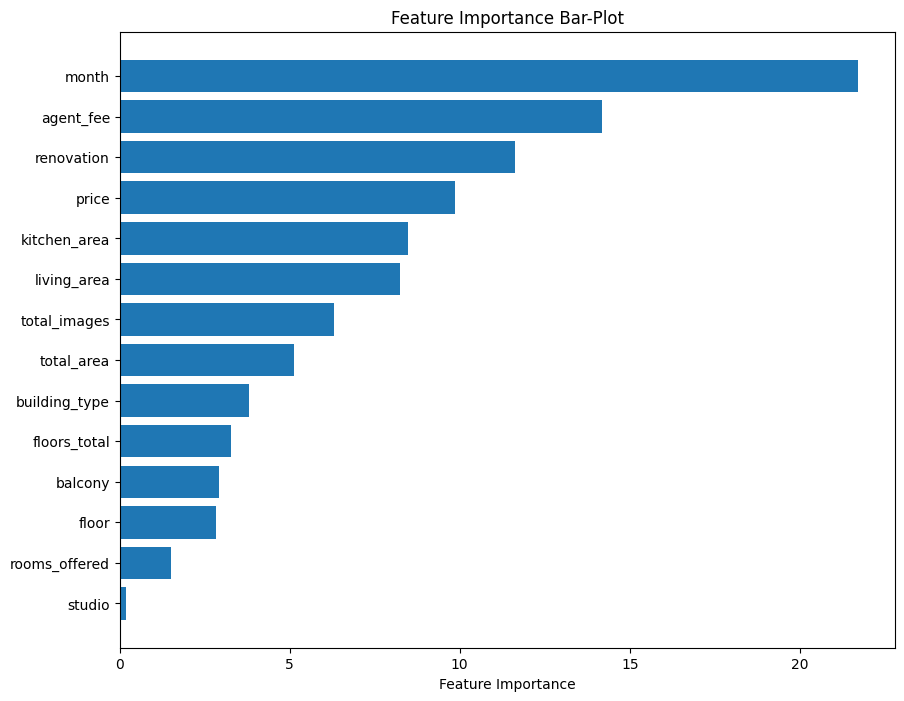

In [108]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
import numpy as np

# Получаем важности признаков
feature_importances = gbm_better.get_feature_importance()
feature_names = gbm_better.feature_names_

# Сортируем важности по убыванию
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

# Построим горизонтальный bar-plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Bar-Plot")
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы важные признаки были наверху
plt.show()


In [109]:
threshold = 0.05

important_features = sorted_feature_names[sorted_importances >= threshold]

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]


In [110]:
model_important = CatBoostRegressor(random_seed=0, loss_function='MAE', cat_features=['month'], depth= 9, learning_rate = 0.05)
model_important.fit(X_train_important, y_train, verbose=False)

y_pred_important = model_important.predict(X_test_important)

from sklearn.metrics import mean_absolute_error
mae_important = mean_absolute_error(y_test, y_pred_important)
print(f"MAE после удаления неважных признаков: {mae_important}")


MAE после удаления неважных признаков: 33.949690091438214


In [115]:
mae_full = mean_absolute_error(y_test, best_model_categorical.predict(X_test))

difference_in_mae = mae_important - mae_full
print(f"Разница в MAE: {difference_in_mae}")


Разница в MAE: 0.29518925604880053
